# Figure 2

In [2]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle 

npr.seed(0)

In [4]:
from general_utilities import * #imports utilities.py file which has functions for plotting psychometrics and other useful things
from HMM_functions import * #imports HMM_functions.py file which has functions for getting the data read for the ssm.HMM
from functions_for_making_plots import * 
from decoder_functions import * #imports decoder_functions.py file which has functions for decoding things from neural data 
from data_extraction_for_svm import *

## Plotting preferences

In [5]:
colors = np.array([[0,102,51],[237,177,32],[233,0,111],[39,110,167]])/255

#Remove right and top spines from plots (personal preference)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
dpi = 100

## Figure 2B

In [6]:
from scipy import stats

# Define the filename from which to load the dictionary
filename = 'state_decoding_dict.pkl'

# Open the file in binary read mode and load the dictionary using pickle
with open(filename, 'rb') as file:
    state_decoding_dict = pickle.load(file)
    
PPC_state_decoding = state_decoding_dict['PPC_state_decoding']
AC_state_decoding = state_decoding_dict['AC_state_decoding']

PPC_state_decoding_mean = PPC_state_decoding.mean()*100
AC_state_decoding_mean = AC_state_decoding.mean()*100

for region_mean in [PPC_state_decoding_mean, AC_state_decoding_mean]:
    print(f"'mean_decoding_acc': {region_mean} ")

for region in [PPC_state_decoding, AC_state_decoding]:
    t_statistic, p_value = stats.ttest_1samp(region, popmean=0.5)
    print(f"One-Sample t-Test statistic: {t_statistic}, P-value: {p_value}")

'mean_decoding_acc': 74.16087277975105 
'mean_decoding_acc': 53.2595130008856 
One-Sample t-Test statistic: 9.244356860935202, P-value: 2.2286271305436026e-09
One-Sample t-Test statistic: 1.218991401535097, P-value: 0.23776601581854515


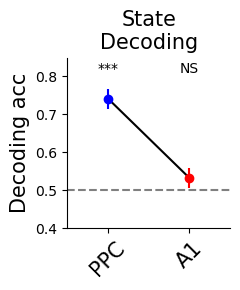

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(2.5,3), dpi=dpi)

axs.errorbar(x=[1], y=PPC_state_decoding_mean/100, yerr=stats.sem(PPC_state_decoding), fmt='o', color='blue')
axs.errorbar(x=[2], y=(AC_state_decoding_mean)/100, yerr=stats.sem(AC_state_decoding), fmt='o', color='red')
axs.plot([1,2], [PPC_state_decoding_mean/100,(AC_state_decoding_mean)/100], color='black')

axs.set_xticks(list(range(1,3)))
axs.set_xticklabels(['PPC', 'A1'], rotation=45, fontsize=15)
axs.set_ylabel('Decoding acc', fontsize=15)
axs.axhline(y=.5, color='grey', linestyle='--')
axs.set_ylim([.40,0.85])
axs.set_xlim([0.5,2.5])

axs.text(1, .81, '***', ha='center')
axs.text(2, .81, 'NS', ha='center')

axs.spines['top'].set_visible(False) 
axs.spines['right'].set_visible(False)
axs.set_title('State\nDecoding', fontsize=15, color='black')

fig.tight_layout()

#plt.savefig('state_decoding.svg', format='svg', bbox_inches="tight")

## Figure 2 C,E

In [8]:
# Define the filename from which to load the dictionary
filename = 'stim_choice_decoding_dict.pkl'

# Open the file in binary read mode and load the dictionary using pickle
with open(filename, 'rb') as file:
    stim_choice_decoding_dict = pickle.load(file)

stim_choice_decoding_dict.keys()

# Dynamically create variables from the dictionary keys
for key in stim_choice_decoding_dict:
    globals()[key] = stim_choice_decoding_dict[key]

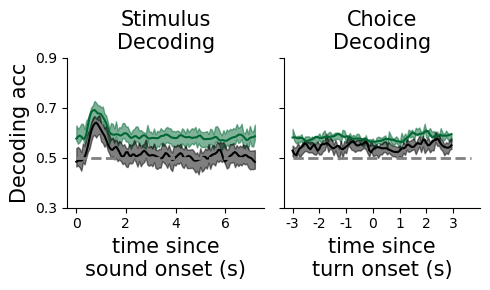

In [9]:
def get_error(svm_result, plot_num, color):
        x = list(range(svm_result.shape[0]))
        y = gaussian_filter(svm_result, sigma=2)
        error = svm_result.std(axis=0)
        y += np.random.normal(0, 0.01, size=y.shape)

        return axs[plot_num].fill_between(x, y-error, y+error, alpha=0.5, edgecolor=color, facecolor=color)

fig, axs = plt.subplots(1,2,figsize = (5,3), dpi=dpi, sharey=True)

axs[0].plot(gaussian_filter(stim_state1_AC.mean(axis=0), sigma=1), color=colors[0]) 
axs[0].plot(gaussian_filter(stim_allstate_AC.mean(axis=0), sigma=1), color='black')

get_error(stim_state1_AC.mean(axis=0), 0, colors[0])
get_error(stim_allstate_AC.mean(axis=0), 0, 'black')

axs[0].set_title('Stimulus\nDecoding', fontsize=15)
axs[0].set_ylabel('Decoding acc', fontsize=15)
axs[0].set_xlabel('time since\nsound onset (s)', fontsize=15)
axs[0].hlines(y=0.5, xmin=0, xmax=100, colors='grey', linestyles='--', lw=2)
axs[0].set_yticks([0.3,0.5,0.7,0.9])
axs[0].set_xticks([0,30,60,90])
axs[0].set_xticklabels(['0','2','4','6'])

axs[1].plot(gaussian_filter(choice_state1_AC.mean(axis=0), sigma=1), color=colors[0]) 
axs[1].plot(gaussian_filter(choice_allstate_AC.mean(axis=0), sigma=1), color='black')

get_error(choice_state1_AC.mean(axis=0), 1, colors[0])
get_error(choice_allstate_AC.mean(axis=0), 1, 'black')

axs[1].set_title('Choice\nDecoding', fontsize=15)
axs[1].set_xlabel('time since\nturn onset (s)', fontsize=15)
axs[1].hlines(y=0.5, xmin=0, xmax=100, colors='grey', linestyles='--', lw=2)
axs[0].set_yticks([0.3,0.5,0.7,0.9])
axs[1].set_xticks([0,15,30,45,60,75,90])
axs[1].set_xticklabels(['-3','-2','-1','0','1','2','3'])

fig.tight_layout()

#plt.savefig('A1_decoding.svg', format='svg', bbox_inches="tight")

## Figure 2 D,F

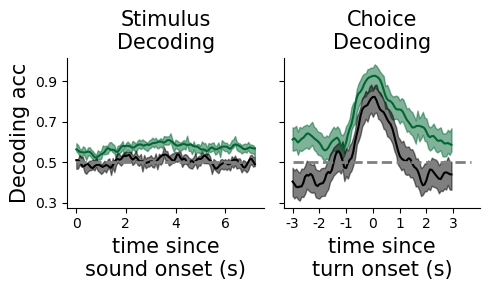

In [10]:
fig, axs = plt.subplots(1,2,figsize = (5,3), dpi=dpi, sharey=True)

def get_error_choice(svm_result, plot_num, color):
    x = list(range(svm_result.shape[0]))
    y = gaussian_filter(svm_result, sigma=2)
    error = svm_result.std(axis=0)/2
    y += np.random.normal(0, 0.01, size=y.shape)

    return axs[plot_num].fill_between(x, y-error, y+error, alpha=0.5, edgecolor=color, facecolor=color)

axs[0].plot(gaussian_filter(stim_state1_PPC.mean(axis=0), sigma=1), color=colors[0]) 
axs[0].plot(gaussian_filter(stim_allstate_PPC.mean(axis=0), sigma=1), color='black')

get_error(stim_state1_PPC.mean(axis=0), 0, colors[0])
get_error(stim_allstate_PPC.mean(axis=0), 0, 'black')

axs[0].set_title('Stimulus\nDecoding', fontsize=15)
axs[0].set_ylabel('Decoding acc', fontsize=15)
axs[0].set_xlabel('time since\nsound onset (s)', fontsize=15)
axs[0].hlines(y=0.5, xmin=0, xmax=100, colors='grey', linestyles='--', lw=2)
axs[0].set_yticks([0.3,0.5,0.7,0.9])
axs[0].set_xticks([0,30,60,90])
axs[0].set_xticklabels(['0','2','4','6'])

axs[1].plot(gaussian_filter(choice_state1_PPC, sigma=1), color=colors[0]) 
axs[1].plot(gaussian_filter(choice_allstate_PPC-.1, sigma=1), color='black')

get_error_choice(choice_state1_PPC, 1, colors[0])
get_error_choice(choice_allstate_PPC-.1, 1, 'black')

axs[1].set_title('Choice\nDecoding', fontsize=15)
axs[1].set_xlabel('time since\nturn onset (s)', fontsize=15)
axs[1].hlines(y=0.5, xmin=0, xmax=100, colors='grey', linestyles='--', lw=2)
axs[1].set_yticks([0.3,0.5,0.7,0.9])
axs[1].set_xticks([0,15,30,45,60,75,90])
axs[1].set_xticklabels(['-3','-2','-1','0','1','2','3'])

fig.tight_layout()

#plt.savefig('PPC_decoding.svg', format='svg', bbox_inches="tight")